# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

In this project, we will scrape movie-related data from the IMDB Box Office Mojo website. The goal is to extract key insights about movie performance, analyze the data, and present it on a Flask dashboard for easy access and visualization

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [262]:
import requests

url = 'https://www.boxofficemojo.com/year/world/'
url_get = requests.get(url)

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [263]:
url_get.content[1:500]

b'!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [264]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

Explore the HTML structure by using .prettify() to view a formatted version and Identify the HTML tag that holds the table or relevant data you need. You will typically use .find() or .find_all() to locate the elements:

In [265]:
table = soup.find('table')
print(table.prettify()[1:500])

table class="a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated">
 <tr>
  <th class="a-text-right mojo-field-type-rank mojo-sort-column mojo-sortable-column a-nowrap">
   <a class="a-link-normal a-nowrap" href="?sort=rank&amp;ref_=bo_ydw__resort#table" title="Rank">
    <span class="a-color-state">
     Rank
    </span>
    <span class="a-letter-space">
    </span>
    <span class="icon aok-relative">
     <i class="a-icon a-icon-collapse" role="presentati


Next, we need to find the row length.

In [266]:
rows = table.find_all('tr')[1:]

row_length = len(rows)
print(f"Number of rows: {row_length}")


Number of rows: 200


Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [267]:
data = []
for row in rows:
    columns = row.find_all('td')
    data.append([column.text.strip() for column in columns])


In [268]:
headers = [header.text for header in table.find_all('th')]

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [269]:
import pandas as pd

df = pd.DataFrame(data, columns=headers)
df.head()

,Rank,Release Group\n,Worldwide,Domestic,%,Foreign,%
0,1,Inside Out 2,"$1,668,469,176","$651,011,872",39%,"$1,017,457,304",61%
1,2,Deadpool & Wolverine,"$1,265,993,455","$605,188,101",47.8%,"$660,805,354",52.2%
2,3,Despicable Me 4,"$915,650,100","$355,816,100",38.9%,"$559,834,000",61.1%
3,4,Dune: Part Two,"$711,844,358","$282,144,358",39.6%,"$429,700,000",60.4%
4,5,Godzilla x Kong: The New Empire,"$567,650,016","$196,350,016",34.6%,"$371,300,000",65.4%


### Data Cleansing

Clean the data by handling missing values, converting data types

In [270]:
df.columns=["Rank", "Movie Title", "Worldwide", "Domestic", "Percent Domestic", "Foreign", "Percent Foreign"]

In [271]:
df['Worldwide'] = df['Worldwide'].replace({'\$': '', ',': ''}, regex=True)
df['Domestic'] = df['Domestic'].replace({'\$': '', ',': ''}, regex=True)
df['Foreign'] = df['Foreign'].replace({'\$': '', ',': ''}, regex=True)
df['Percent Foreign'] = df['Percent Foreign'].replace({'%': '', ',': ''}, regex=True)
df['Percent Domestic'] = df['Percent Domestic'].replace({'%': '', ',': ''}, regex=True)

df['Worldwide'] = pd.to_numeric(df['Worldwide'], errors='coerce', )
df['Domestic'] = pd.to_numeric(df['Domestic'], errors='coerce')
df['Foreign'] = pd.to_numeric(df['Foreign'], errors='coerce')
df['Percent Foreign'] = pd.to_numeric(df['Percent Foreign'], errors='coerce')
df['Percent Domestic'] = pd.to_numeric(df['Percent Domestic'], errors='coerce')

df.dropna(inplace=True)

df.head()

,Rank,Movie Title,Worldwide,Domestic,Percent Domestic,Foreign,Percent Foreign
0,1,Inside Out 2,1668469176,651011872.0,39.0,1.017457e+09,61.0
1,2,Deadpool & Wolverine,1265993455,605188101.0,47.8,6.608054e+08,52.2
2,3,Despicable Me 4,915650100,355816100.0,38.9,5.598340e+08,61.1
3,4,Dune: Part Two,711844358,282144358.0,39.6,4.297000e+08,60.4
4,5,Godzilla x Kong: The New Empire,567650016,196350016.0,34.6,3.713000e+08,65.4


In [272]:
df.dtypes

Rank                 object
Movie Title          object
Worldwide             int64
Domestic            float64
Percent Domestic    float64
Foreign             float64
Percent Foreign     float64
dtype: object

### Data Visualization

(please change this markdown with your explanation of what you do for data wrangling)

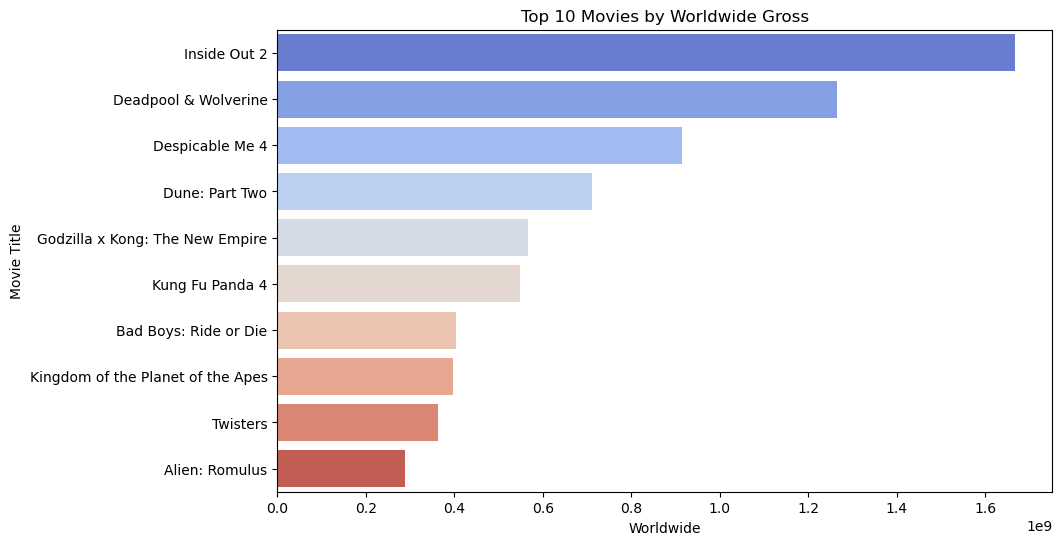

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_movies = df.sort_values('Worldwide', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Worldwide', y='Movie Title', data=top_10_movies, palette='coolwarm')
plt.title('Top 10 Movies by Worldwide Gross')
plt.show()

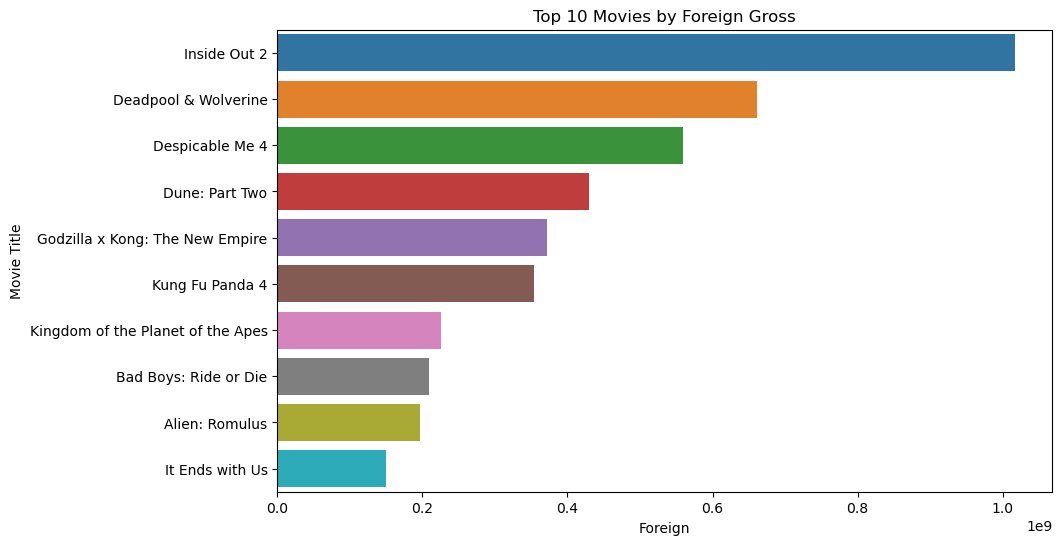

In [274]:
top_10_movies = df.sort_values('Foreign', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Foreign', y='Movie Title', data=top_10_movies)
plt.title('Top 10 Movies by Foreign Gross')
plt.show()

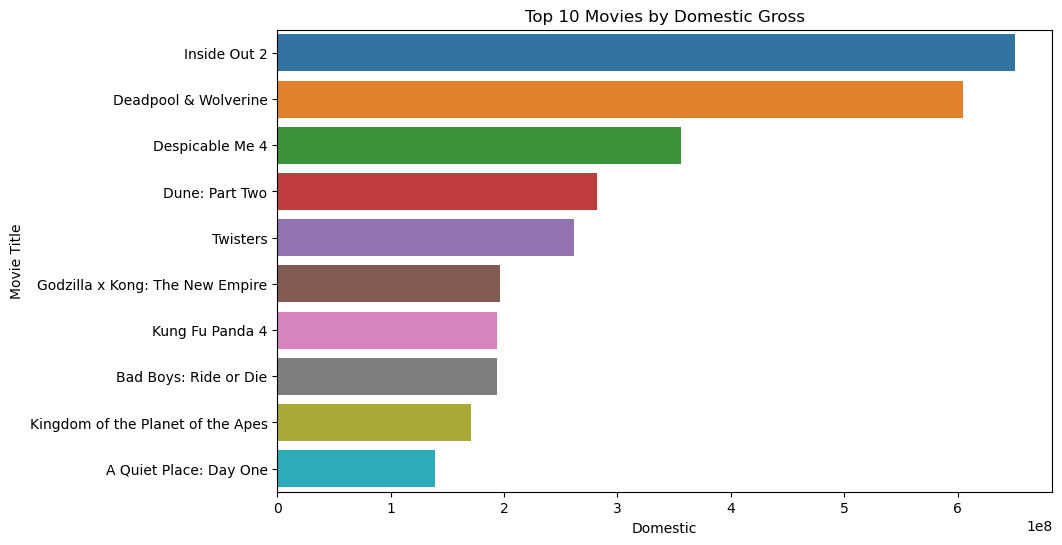

In [275]:
top_10_movies = df.sort_values('Domestic', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Domestic', y='Movie Title', data=top_10_movies)
plt.title('Top 10 Movies by Domestic Gross')
plt.show()

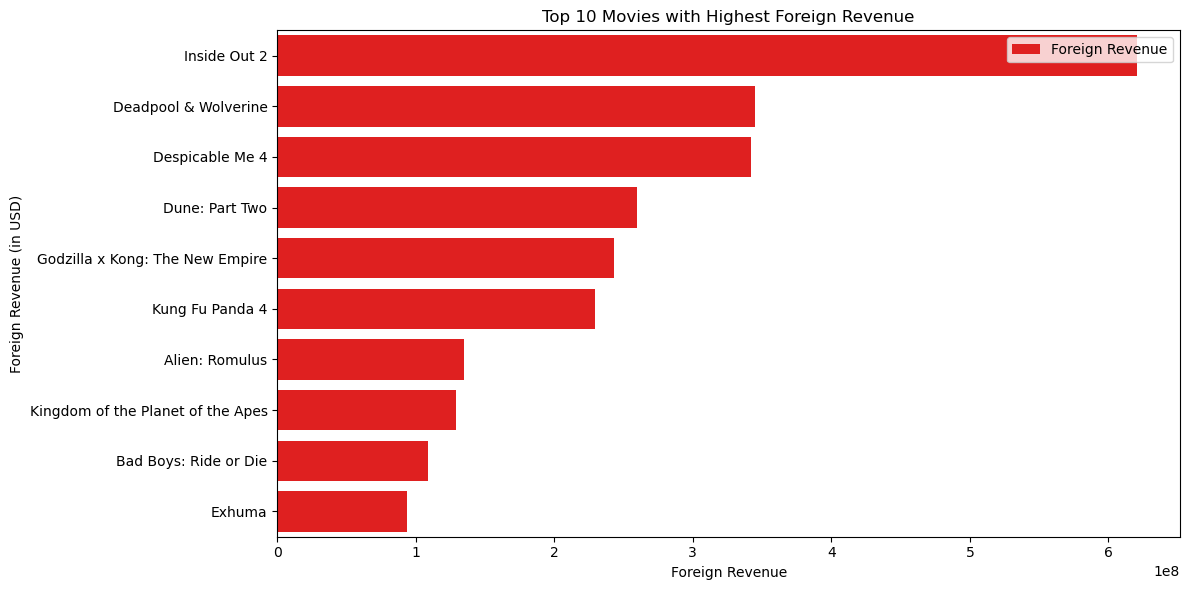

In [276]:
df['Foreign Revenue'] = df['Percent Foreign'] * df['Foreign']/100

top_10_movies = df.sort_values('Foreign Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Foreign Revenue', y='Movie Title', data=top_10_movies, color='red', label='Foreign Revenue')

plt.title('Top 10 Movies with Highest Foreign Revenue')
plt.ylabel('Foreign Revenue (in USD)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


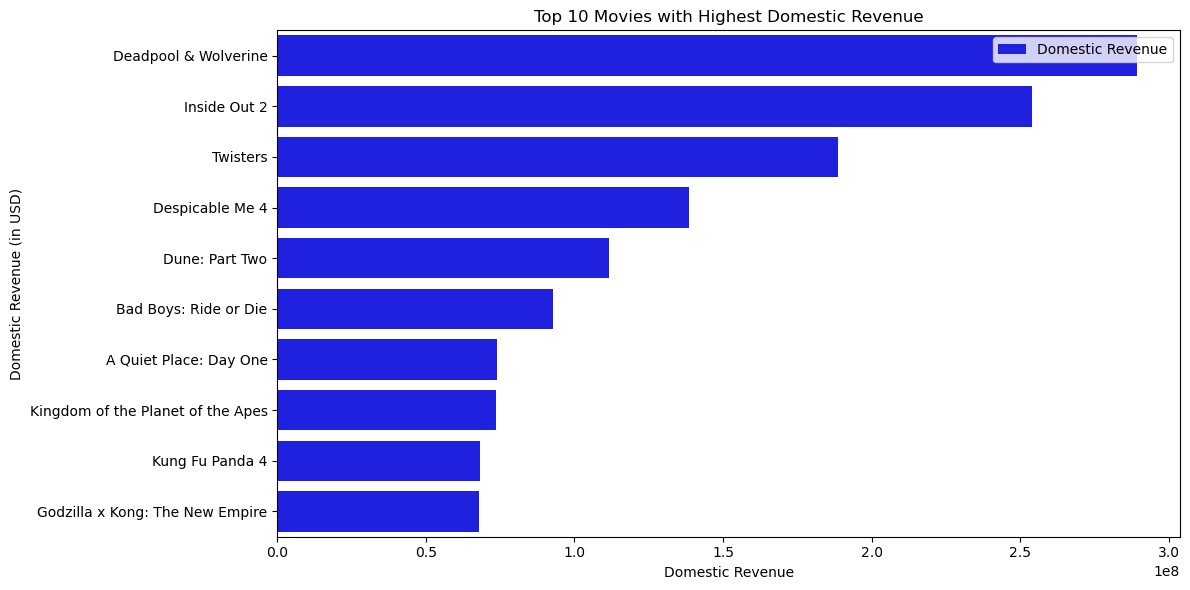

In [278]:
df['Domestic Revenue'] = df['Percent Domestic'] * df['Domestic']/100

top_10_movies = df.sort_values('Domestic Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Domestic Revenue', y='Movie Title', data=top_10_movies, color='blue', label='Domestic Revenue')

plt.title('Top 10 Movies with Highest Domestic Revenue')
plt.ylabel('Domestic Revenue (in USD)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis



Revenue Calculation: To calculate each movie's domestic revenue, I used the percentage of domestic earnings relative to the total revenue. By multiplying this percentage by the actual domestic earnings and dividing by 100, I obtained the exact domestic revenue figures. This method gives us a clear picture of how much money these films made within the domestic market.

Sorting and Selecting Top Movies: After calculating the revenues, I sorted the movies in descending order by their domestic earnings. This allowed us to focus on the top 10 movies that made the most money locally. The goal here is to highlight the most commercially successful films in the domestic box office.

Bar Plot Visualization: The bar plot I used is a straightforward way to compare the domestic earnings of these top 10 films. On the Y-axis, I have the movie titles, and on the X-axis, I show the domestic revenue in USD. The bars are displayed horizontally to make the comparison easier to interpret. The color choice of blue helps distinguish the revenue amounts visually.

Clear Labeling and Design: I’ve made sure to include clear labels for both the axis and the title, making the visualization easy to understand at a glance. The legend in the upper right corner emphasizes that I’re looking at domestic revenue specifically. I've also used a "tight layout" to ensure the design is clean and everything fits Ill within the frame.

This visualization allows us to quickly identify the leading films in the domestic market and compare their earnings. For example, you might see that some films significantly outperform others, indicating strong domestic popularity.

Looking at these top movies, we can start asking questions like:

Are there certain genres or franchises that consistently perform well in the domestic market?
Do these movies share common characteristics, such as big-name actors, directors, or marketing campaigns?

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.